In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
df = pd.read_csv('C:/ishan/Drinks Promotion/russian_alcohol_consumption.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [21]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 1615 rows and 7 columns.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [23]:
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [24]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

In [25]:
df_alc_cols = list(df.select_dtypes(include=['float64']).columns)

In [26]:
df.dropna(inplace=True)

In [27]:
def alc_plot(cols, plot_func, data=df, **kwargs):

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for col, ax in zip(df_alc_cols, axes.T.ravel()):
        plot_func(col, ax=ax, data=data, **kwargs)
        plt.xlabel(col)
    fig.delaxes(axes[1, 2])
    
    return fig, axes



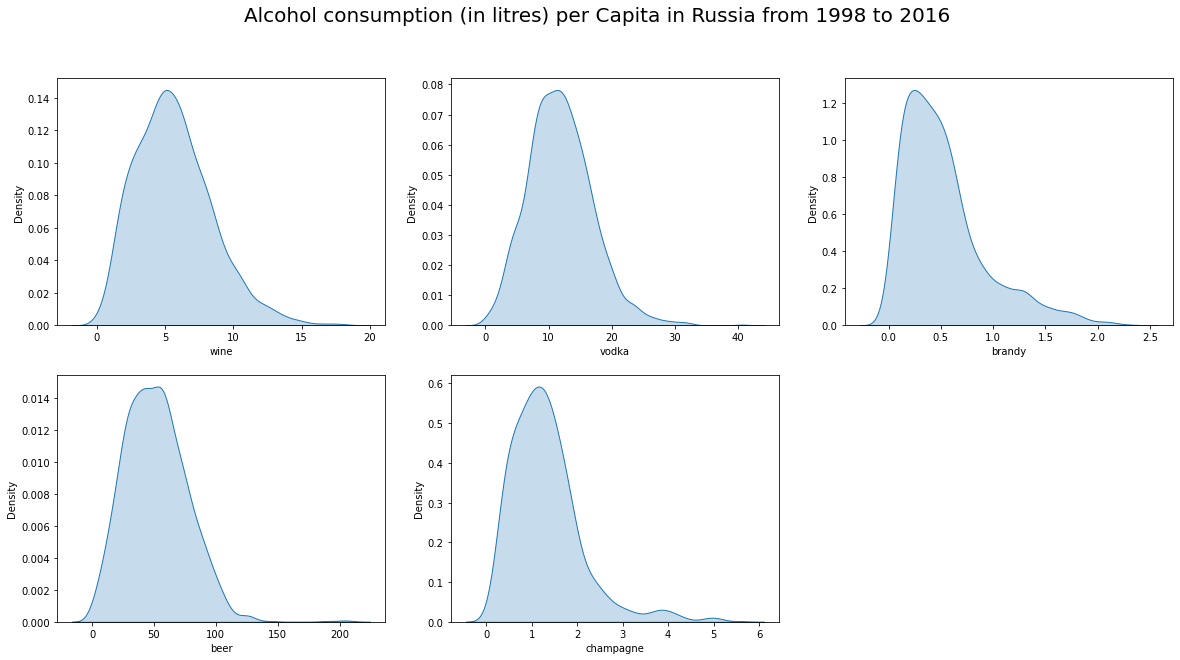

In [28]:
fig, axes = alc_plot(df_alc_cols, sns.kdeplot, shade=True)
fig.suptitle("Alcohol consumption (in litres) per Capita in Russia from 1998 to 2016", fontsize=20)
plt.show()

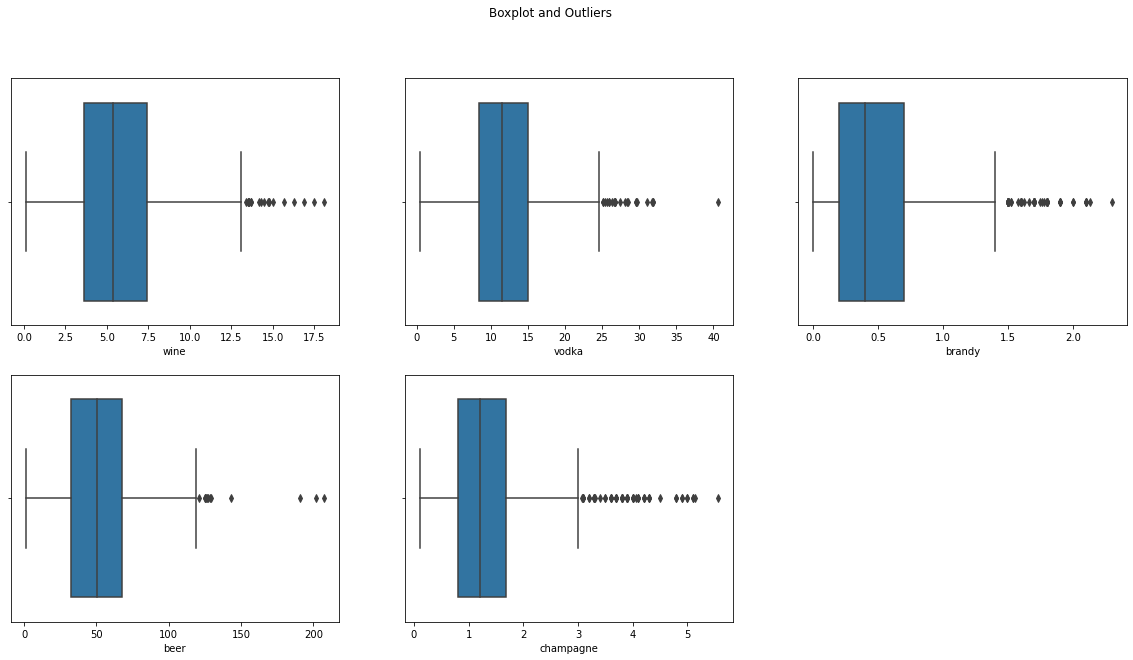

In [29]:
fig, axes = alc_plot(df_alc_cols, sns.boxplot)
fig.suptitle("Boxplot and Outliers")
plt.show()

In [30]:
# no of regions
df['region'].nunique()

84

In [31]:
# total sales by alcohol type
for cols in df_alc_cols:
    print(f"Total sales of {cols} is {round(df[cols].sum(), 2)} litres.")

Total sales of wine is 8734.08 litres.
Total sales of beer is 79800.15 litres.
Total sales of vodka is 18363.3 litres.
Total sales of champagne is 2037.75 litres.
Total sales of brandy is 816.32 litres.


In [32]:
df_st_prb = df[df['region'] == 'Saint Petersburg']
df_yearly = pd.DataFrame(df.groupby('year').agg('mean')).reset_index()
df['total_alc'] = df.apply(lambda x: x.wine + x.beer + x.vodka + x.champagne + x.brandy, axis=1)
df_st_prb['total_alc'] = df_st_prb.apply(lambda x: x.wine + x.beer + x.vodka + x.champagne + x.brandy, axis=1)

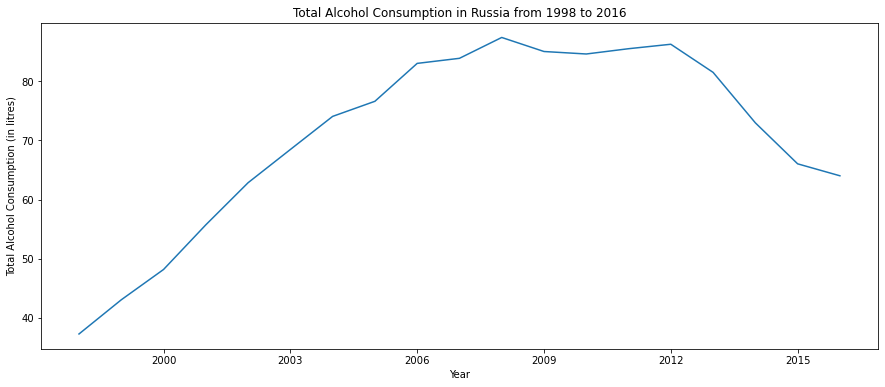

In [33]:
df_yearly = pd.DataFrame(df.groupby('year').agg('mean')).reset_index()
fig, ax = plt.subplots(1, 1, figsize = (15,6))
ax.set(title = "Total Alcohol Consumption in Russia from 1998 to 2016", xlabel = "Year", ylabel = "Total Alcohol Consumption (in litres)",  xticks = np.arange(1997, 2017, 3))
sns.lineplot(x = 'year', y = 'total_alc', data = df_yearly)
plt.show()

wine
beer
vodka
champagne
brandy


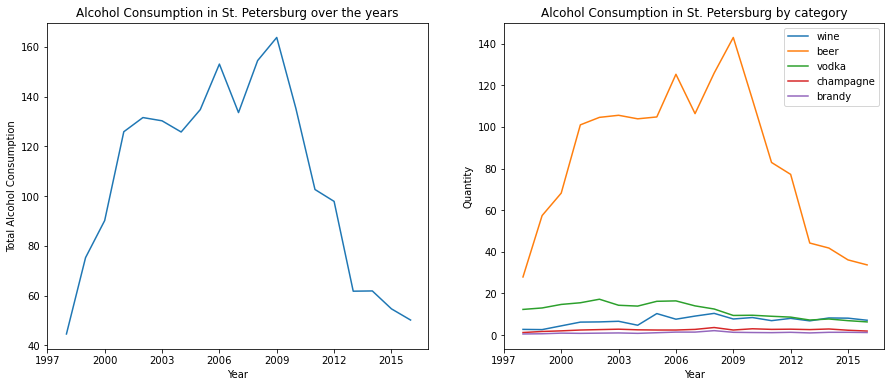

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

sns.lineplot(x = 'year', y = 'total_alc', data = df_st_prb, ax = ax1)
ax1.set(title = 'Alcohol Consumption in St. Petersburg over the years', xticks = np.arange(1997, 2017, 3), xlabel = 'Year', ylabel = 'Total Alcohol Consumption')

for col in df_st_prb.columns:
    if col not in ['year', 'region', 'total_alc']:
        print(col)
        sns.lineplot(x = 'year', y = col, data = df_st_prb, ax = ax2)
        ax2.set(title = 'Alcohol Consumption in St. Petersburg by category', xticks = np.arange(1997, 2017, 3), ylabel='Quantity', xlabel = 'Year')
        ax2.legend(df_st_prb.columns[2:-1])
    

plt.show()



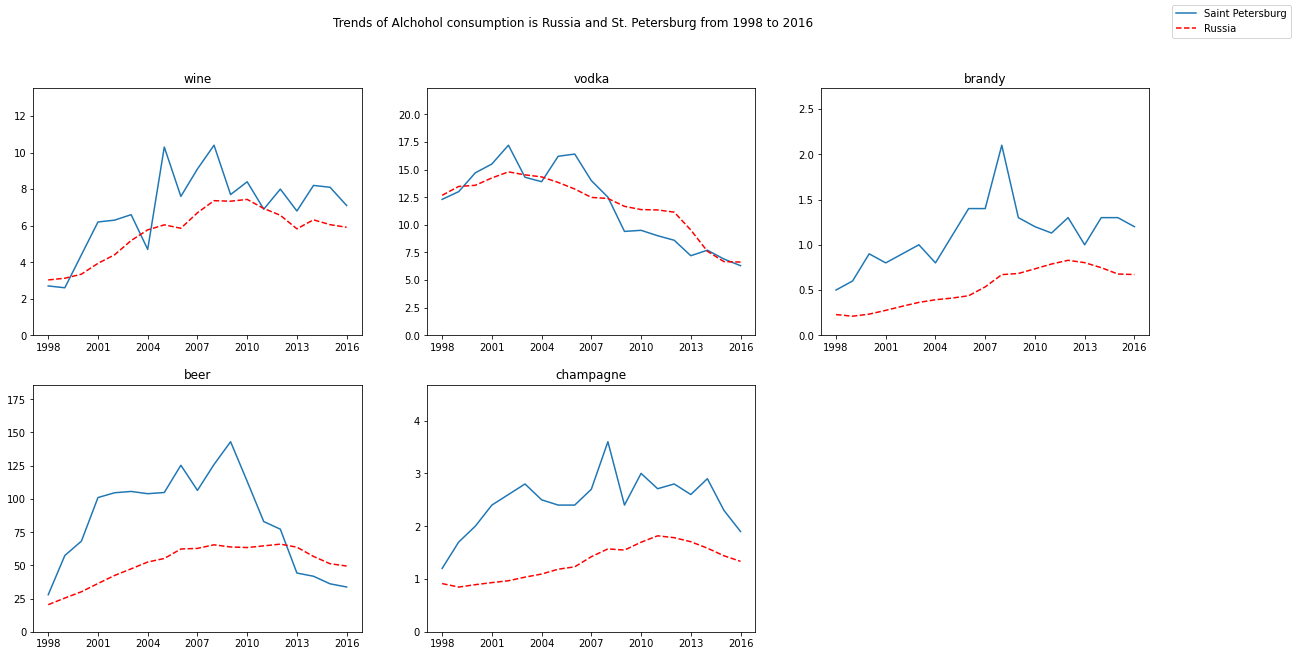

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for col, ax in zip(df_alc_cols, axes.T.ravel()):
    sns.lineplot(x = 'year', y = col, data = df_st_prb, ax = ax)
    sns.lineplot(x = 'year', y = col, data = df_yearly, ax = ax, color = 'r', linestyle = '--')
    ax.set(xlabel = "", ylabel = "", xticks = np.arange(1998, 2017, 3), ylim = (0, np.max(df_st_prb[col])*1.3), title = col)


fig.suptitle('Trends of Alchohol consumption is Russia and St. Petersburg from 1998 to 2016', fontsize = 20)
fig.legend(["Saint Petersburg", "Russia"])
fig.delaxes(axes[1, 2])
plt.show()

In [36]:
df_long = pd.melt(df,
                  id_vars = ['region', 'year'],
                  value_vars = df_alc_cols,
                  var_name = "alcohol",
                  value_name = "consumption per capita in litre")

func_list = [np.mean, np.median, np.std]

df_by_region = df_long.drop(columns="year").groupby(['region', 'alcohol']).agg(func_list)
df_by_region.rename(columns = {"amin": "min",
                               "amax": "max"}, inplace = True)


df_by_region.columns = df_by_region.columns.droplevel(0)
df_by_region = df_by_region.add_prefix("consumption_").reset_index()


In [37]:
df_by_region = df_by_region.pivot(index = "region", columns = "alcohol")
df_by_region.columns = df_by_region.columns.map("_".join)

In [38]:
df_by_region

,consumption_mean_beer,consumption_mean_brandy,consumption_mean_champagne,consumption_mean_vodka,consumption_mean_wine,consumption_median_beer,consumption_median_brandy,consumption_median_champagne,consumption_median_vodka,consumption_median_wine,consumption_std_beer,consumption_std_brandy,consumption_std_champagne,consumption_std_vodka,consumption_std_wine
region,,,,,,,,,,,,,,,
Altai Krai,48.373158,0.236842,1.207368,9.465789,3.174211,51.6,0.20,1.2,9.9,3.3,13.259329,0.116479,0.225409,2.620541,1.154303
Altai Republic,36.724211,0.253684,0.934737,9.683684,5.190000,39.0,0.30,1.0,9.9,5.4,18.674874,0.159451,0.221695,1.262164,0.911903
Amur Oblast,53.377368,0.396842,1.115789,14.216842,5.221579,50.7,0.40,1.0,15.8,5.8,19.580882,0.183698,0.512362,4.387590,1.802024
Arkhangelsk Oblast,47.036842,0.870526,1.631053,17.381053,8.670000,45.6,0.90,1.6,16.2,9.0,20.868057,0.311724,0.612907,5.492676,2.294363
Astrakhan Oblast,54.695263,0.361053,0.861579,9.296842,4.469474,59.8,0.30,0.9,9.5,4.5,19.833411,0.214318,0.144694,2.383315,0.763715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,67.206842,0.517895,0.857368,17.217895,9.328421,84.8,0.60,0.8,17.4,9.4,26.665173,0.187604,0.350996,4.930864,3.638042
Voronezh Oblast,54.911053,0.402105,1.500000,9.916316,4.637895,51.1,0.44,1.4,10.5,4.7,21.538209,0.176622,0.338296,3.060638,1.807686
Yamalo-Nenets Autonomous Okrug,80.137895,0.951579,1.485789,15.093158,5.312105,87.4,1.10,1.7,14.1,5.0,25.089080,0.543336,0.668625,4.163132,1.334544


In [39]:
# Rescaling data
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
df_by_region_std = standard.fit_transform(df_by_region)
df_by_region_std = pd.DataFrame(df_by_region_std, index = df_by_region.index, columns = df_by_region.columns)
df_by_region_std.head()

,consumption_mean_beer,consumption_mean_brandy,consumption_mean_champagne,consumption_mean_vodka,consumption_mean_wine,consumption_median_beer,consumption_median_brandy,consumption_median_champagne,consumption_median_vodka,consumption_median_wine,consumption_std_beer,consumption_std_brandy,consumption_std_champagne,consumption_std_vodka,consumption_std_wine
region,,,,,,,,,,,,,,,
Altai Krai,-0.138264,-1.064966,-0.185860,-0.572621,-1.313326,-0.112537,-1.122953,-0.229657,-0.438426,-1.267950,-0.519128,-1.021822,-0.933425,-0.473737,-0.819548
Altai Republic,-0.850917,-1.005799,-0.640198,-0.515274,-0.238109,-0.804912,-0.799579,-0.548519,-0.438426,-0.229477,0.086408,-0.715603,-0.948000,-1.416624,-1.085555
Amur Oblast,0.167881,-0.502877,-0.338476,0.677797,-0.221265,-0.161992,-0.476206,-0.548519,1.121401,-0.031672,0.187713,-0.542816,0.192478,0.752820,-0.108744
Arkhangelsk Oblast,-0.220016,1.161201,0.520206,1.510578,1.618113,-0.442239,1.140661,0.408068,1.227152,1.550763,0.331637,0.369493,0.586981,1.519890,0.431544
Astrakhan Oblast,0.248507,-0.628608,-0.762115,-0.617086,-0.622436,0.338056,-0.799579,-0.707951,-0.544177,-0.674537,0.215949,-0.324621,-1.250125,-0.638402,-1.248175


In [40]:
df_by_region

,consumption_mean_beer,consumption_mean_brandy,consumption_mean_champagne,consumption_mean_vodka,consumption_mean_wine,consumption_median_beer,consumption_median_brandy,consumption_median_champagne,consumption_median_vodka,consumption_median_wine,consumption_std_beer,consumption_std_brandy,consumption_std_champagne,consumption_std_vodka,consumption_std_wine
region,,,,,,,,,,,,,,,
Altai Krai,48.373158,0.236842,1.207368,9.465789,3.174211,51.6,0.20,1.2,9.9,3.3,13.259329,0.116479,0.225409,2.620541,1.154303
Altai Republic,36.724211,0.253684,0.934737,9.683684,5.190000,39.0,0.30,1.0,9.9,5.4,18.674874,0.159451,0.221695,1.262164,0.911903
Amur Oblast,53.377368,0.396842,1.115789,14.216842,5.221579,50.7,0.40,1.0,15.8,5.8,19.580882,0.183698,0.512362,4.387590,1.802024
Arkhangelsk Oblast,47.036842,0.870526,1.631053,17.381053,8.670000,45.6,0.90,1.6,16.2,9.0,20.868057,0.311724,0.612907,5.492676,2.294363
Astrakhan Oblast,54.695263,0.361053,0.861579,9.296842,4.469474,59.8,0.30,0.9,9.5,4.5,19.833411,0.214318,0.144694,2.383315,0.763715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,67.206842,0.517895,0.857368,17.217895,9.328421,84.8,0.60,0.8,17.4,9.4,26.665173,0.187604,0.350996,4.930864,3.638042
Voronezh Oblast,54.911053,0.402105,1.500000,9.916316,4.637895,51.1,0.44,1.4,10.5,4.7,21.538209,0.176622,0.338296,3.060638,1.807686
Yamalo-Nenets Autonomous Okrug,80.137895,0.951579,1.485789,15.093158,5.312105,87.4,1.10,1.7,14.1,5.0,25.089080,0.543336,0.668625,4.163132,1.334544


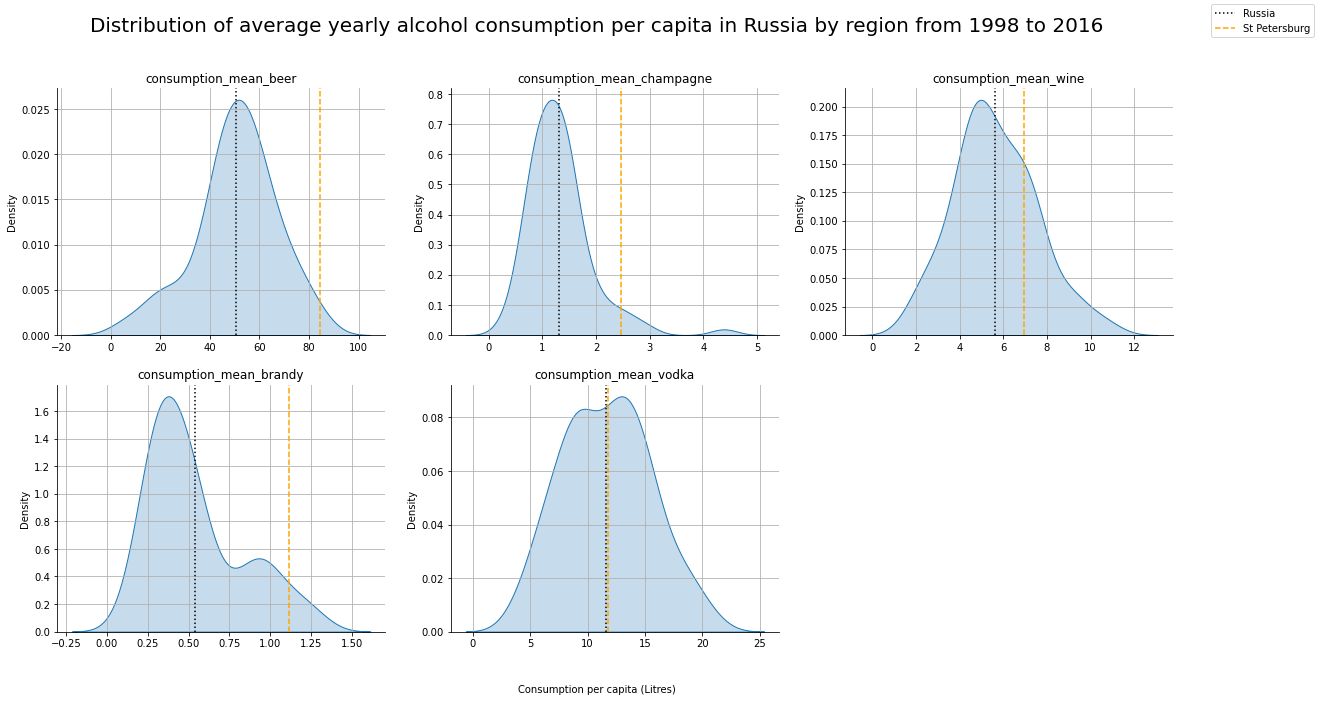

In [43]:
mean_consumption = [col for col in df_by_region.columns if "mean" in col]

fig, axes = plt.subplots(2,3, figsize = (20, 10))
for col, ax in zip(mean_consumption, axes.T.ravel()):
    sns.kdeplot(col, data = df_by_region, ax=ax, shade=True)
    ax.set(xlabel="", title=col)
    ax.axvline(x = df_by_region[col].mean(), linestyle = ":", color = "black")
    ax.axvline(x = df_by_region.query("region == 'Saint Petersburg'")[col].values, linestyle = "--", color = "orange")
    ax.grid(None)
    sns.despine()

fig.suptitle("Distribution of average yearly alcohol consumption per capita in Russia by region from 1998 to 2016", fontsize = 20)
fig.delaxes(axes[1,2])
fig.legend(["Russia", "St Petersburg"])
fig.text(0.5, 0.04, "Consumption per capita (Litres)", ha = 'center')
plt.show()

The total proportion of variance explained by the first four PCA features is: 0.847


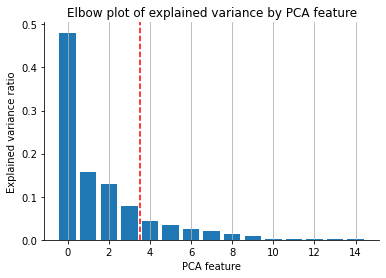

In [48]:
# Reducing the dimensionality of the data set for better results with PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_array = pca.fit_transform(df_by_region_std)

# Visualisng the explained variance by each component
print(f"The total proportion of variance explained by the first four PCA features is: {round(np.sum(pca.explained_variance_ratio_[:4]), 3)}")
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.title("Elbow plot of explained variance by PCA feature")
plt.xlabel("PCA feature")
plt.ylabel("Explained variance ratio")
plt.grid(axis="x")
sns.despine()
plt.axvline(x=3.5, color = "red", linestyle="--")
plt.show()

In [49]:
# Creating PCA data set
pca_df = pd.DataFrame({f"pca_feature_{i+1}": pca_array[:, i] for i in range(4)}, index=df_by_region_std.index)
print("\nPCA-transformed data set:")
pca_df.head()


PCA-transformed data set:


,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4
region,,,,
Altai Krai,-2.637381,-0.041069,-1.155964,-0.065008
Altai Republic,-2.491215,0.163707,0.151623,-0.651481
Amur Oblast,-0.039086,-1.007567,0.010991,1.179464
Arkhangelsk Oblast,3.096248,0.052509,1.362591,0.975470
Astrakhan Oblast,-2.094499,-0.580607,-1.091612,-0.623029


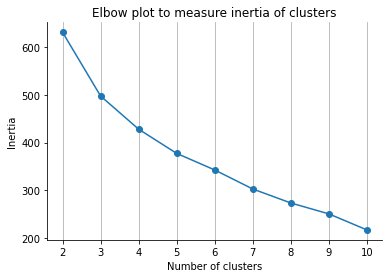

In [50]:
# Kmeans for clustering

from sklearn.cluster import KMeans
cluster_num = np.arange(2,11) 
inertia_list = []

for num in cluster_num:
    kmeans = KMeans(n_clusters = num, random_state = 3, max_iter = 10000, algorithm="full")
    kmeans.fit(pca_df)
    inertia_list.append(kmeans.inertia_)

# Plotting the inertia as a function of the number of clusters
plt.plot(cluster_num, inertia_list, marker="o")
plt.title("Elbow plot to measure inertia of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(axis="x")
sns.despine()
plt.show()

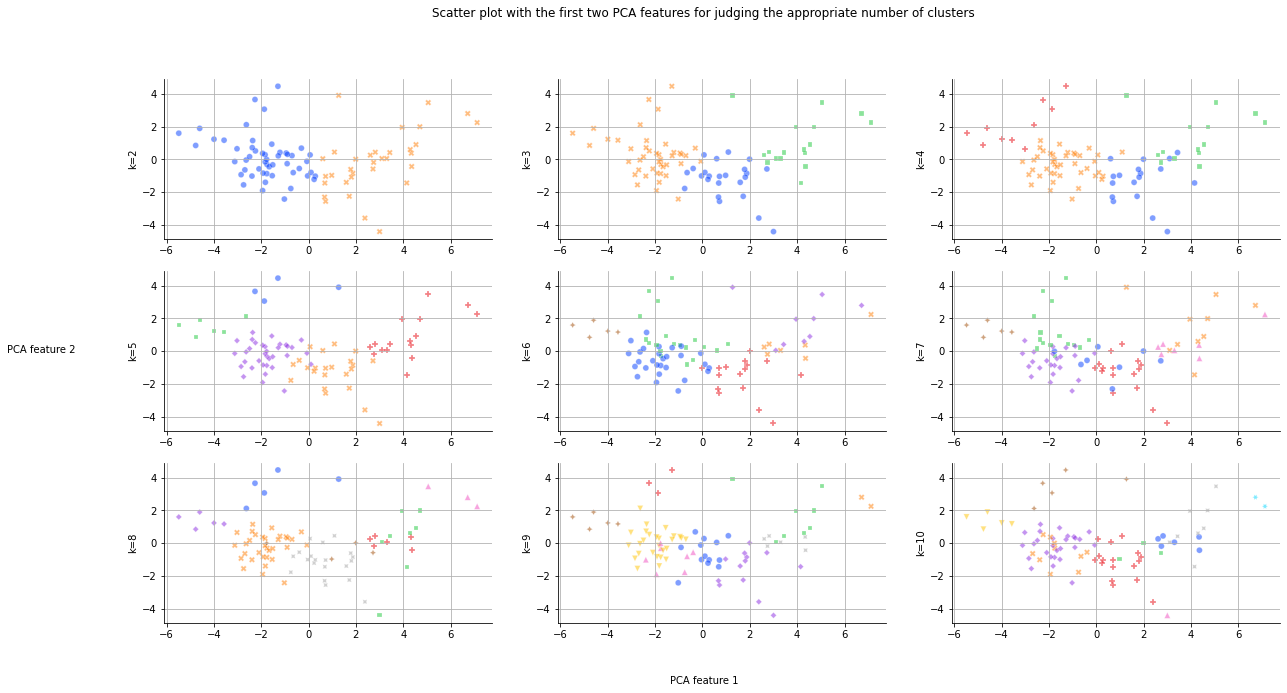

In [52]:
# Gauging which k is the most appropriate for k means clustering
fig, axes = plt.subplots(3,3, figsize = (20, 10))
for num, ax in zip(cluster_num, axes.ravel()):
    kmeans = KMeans(n_clusters = num, random_state = 1, max_iter = 1000, algorithm="full")
    kmeans.fit(pca_df)
    pca_df_k_test = pca_df.copy()
    pca_df_k_test[f"cluster(k={num})"] = kmeans.labels_
    k_palette = sns.color_palette("bright")[:len(set(kmeans.labels_))]
    sns.scatterplot(x="pca_feature_1", 
                    y="pca_feature_2", 
                    data=pca_df_k_test, 
                    style=f"cluster(k={num})", 
                    hue=f"cluster(k={num})", 
                    ax=ax, 
                    palette=k_palette, 
                    legend=False,
                    alpha=.5)
    sns.despine()
    ax.grid(None)
    ax.set(xlabel="", ylabel=f"k={num}")

fig.text(0.5, 0.04, "PCA feature 1", ha = 'center')
fig.text(0.04, 0.5, "PCA feature 2", ha = 'center')
fig.suptitle("Scatter plot with the first two PCA features for judging the appropriate number of clusters")
plt.show()  

Saint Petersburg belongs to cluster 2, and there are 13 regions which belong to the same cluster as Saint Petersburg.



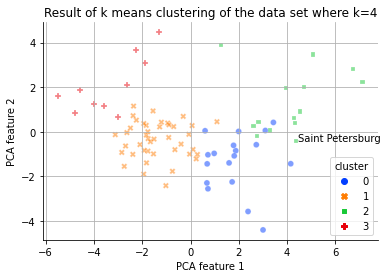

In [53]:
# K means clustering with k=4
kmeans_4 = KMeans(n_clusters = 4, random_state = 1, max_iter = 1000, algorithm="full")
kmeans_4.fit(pca_df)
df_by_region["cluster"] = kmeans_4.labels_
pca_df["cluster"] = kmeans_4.labels_
st_peter_cluster = int(pca_df.query("region == 'Saint Petersburg'")["cluster"].values)
print(f"""Saint Petersburg belongs to cluster {st_peter_cluster}, and there are {len(pca_df.query("cluster == @st_peter_cluster").index) - 1} regions which belong to the same cluster as Saint Petersburg.\n""")

# Visualising to ensure the results make sense
sns.scatterplot(x="pca_feature_1", 
                y="pca_feature_2", 
                data = pca_df, 
                style="cluster", 
                hue="cluster", 
                palette = sns.color_palette("bright")[:4], 
                alpha=.5)
sns.despine()
plt.grid(None)
plt.title("Result of k means clustering of the data set where k=4")
plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.legend(loc="lower right", title="cluster")

# Labelling Saint Petersburg
st_peter_pca_1 = pca_df.query("region == 'Saint Petersburg'").pca_feature_1.values
st_peter_pca_2 = pca_df.query("region == 'Saint Petersburg'").pca_feature_2.values
plt.annotate("Saint Petersburg", xy = (st_peter_pca_1, st_peter_pca_2), xytext=(st_peter_pca_1+.1, st_peter_pca_2))
plt.show()

In [54]:
# Creating PCA component dataframe
pca_component_df = pd.DataFrame(pca.components_[:4], index=[f"pca_component_{i}" for i in range(1, 5)], columns = df_by_region_std.columns)
pca_component_df

,consumption_mean_beer,consumption_mean_brandy,consumption_mean_champagne,consumption_mean_vodka,consumption_mean_wine,consumption_median_beer,consumption_median_brandy,consumption_median_champagne,consumption_median_vodka,consumption_median_wine,consumption_std_beer,consumption_std_brandy,consumption_std_champagne,consumption_std_vodka,consumption_std_wine
pca_component_1,0.219881,0.301647,0.286751,0.317530,0.264626,0.215902,0.293489,0.295084,0.307070,0.248527,0.161588,0.301309,0.263856,0.152422,0.148157
pca_component_2,-0.366549,0.299391,0.278576,-0.121254,-0.127198,-0.350863,0.299222,0.259624,-0.135817,-0.124400,-0.406971,0.214579,0.148222,-0.183701,-0.293548
pca_component_3,-0.333844,-0.042532,-0.175945,0.047274,0.390560,-0.337823,-0.095751,-0.216656,0.065288,0.439995,-0.280270,0.108709,0.047892,-0.111120,0.477399
pca_component_4,-0.258310,-0.088247,-0.127165,0.260351,-0.254101,-0.298098,-0.053886,-0.163416,0.209571,-0.263425,0.084917,0.130373,0.303618,0.654784,0.007063


In [55]:
# Filtering out regions belonging to the same cluster as Saint Petersburg
df_same_cluster = pca_df.query("cluster == @st_peter_cluster")

# Calculating the euclidean distance
st_peter_x, st_peter_y = df_same_cluster.query("region == 'Saint Petersburg'")[["pca_feature_1", "pca_feature_2"]].values.flatten()
distance_array = []

for x, y in zip(df_same_cluster.pca_feature_1, df_same_cluster.pca_feature_2):
    distance = (x-st_peter_x)**2 + (y-st_peter_y)**2
    distance_array.append(distance)   
df_same_cluster["distance"] = np.array(distance_array)

# Getting the 10 most similar regions to Saint Petersburg
df_same_cluster.sort_values(by="distance", ascending=True, inplace=True)
df_same_cluster["ten_most_similar"] = [True if x <= df_same_cluster.iloc[10, 5] else False for x in df_same_cluster.distance]
df_same_cluster

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,cluster,distance,ten_most_similar
region,,,,,,,
Saint Petersburg,4.354273,-0.434522,-2.359004,-1.957575,2,0.000000,True
Moscow Oblast,4.339367,0.377287,-0.870562,0.331624,2,0.659256,True
Nenets Autonomous Okrug,4.294221,0.600711,1.609257,1.588643,2,1.075314,True
Yamalo-Nenets Autonomous Okrug,3.298039,0.052566,-2.132651,0.125398,2,1.352885,True
Leningrad Oblast,4.537314,0.901852,0.494756,-0.137818,2,1.819399,True
Tyumen Oblast,2.746913,-0.184580,-1.980284,-0.070485,2,2.646078,True
Khanty–Mansi Autonomous Okrug – Yugra,2.817725,0.437655,-1.721981,0.226512,2,3.121673,True
Khabarovsk Krai,2.607824,0.258350,-2.041731,0.014135,2,3.530157,True
Murmansk Oblast,3.953907,1.956452,1.219639,0.092034,2,5.877053,True


In [73]:
print("Top 10 regions with similar alcohol consumption to Saint Petersburg:")
print("\n".join(df_same_cluster.index[1:11]))

Top 10 regions with similar alcohol consumption to Saint Petersburg:
Moscow Oblast
Nenets Autonomous Okrug
Yamalo-Nenets Autonomous Okrug
Leningrad Oblast
Tyumen Oblast
Khanty–Mansi Autonomous Okrug – Yugra
Khabarovsk Krai
Murmansk Oblast
Sakhalin Oblast
Moscow
